In [78]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [23]:
def MinMaxScalar(data):
    bunja = data-np.min(data,0)
    bunmo = np.max(data,0) - np.min(data,0)
    return bunja/(bunmo+1e-10)

In [31]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
              [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
              [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
              [816, 820.958984, 1008100, 815.48999, 819.23999],
              [819.359985, 823, 1188100, 818.469971, 818.97998],
              [819, 823, 1198100, 816, 820.450012],
              [811.700012, 815.25, 1098100, 809.780029, 813.669983],
              [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [36]:
x_data.shape

(8, 4)

In [39]:
xy= MinMaxScalar(xy)

In [40]:
x_data = xy[:,:-1]
y_data = xy[:,[-1]]
X= tf.placeholder(tf.float32, shape=[None,4])
Y= tf.placeholder(tf.float32, shape=[None,1])

W = tf.Variable(tf.random_normal([4,1]))
B = tf.Variable(tf.random_normal([1]))

hypothesis = tf.matmul(X,W)+B
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

train = optimizer.minimize(cost)

In [85]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2000):
    cost_v, _ = sess.run([cost, train], feed_dict={X:x_data,Y:y_data})
    if step %100 ==0 :
        print('step', step, 'cost',cost_v)

ValueError: Cannot feed value of shape (8, 4) for Tensor 'Placeholder_26:0', which has shape '(?, 784)'

# MNIST 시작

In [87]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
print(mnist.train.images)

(55000, 784)
(55000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [88]:
x_train = mnist.train.images[:,:]
y_train = mnist.train.labels[:,:]

In [89]:
x_test = mnist.test.images[:,:]
y_test = mnist.test.labels[:,:]

In [67]:
X= tf.placeholder(tf.float32, shape=[None,28*28*1])
Y= tf.placeholder(tf.float32, shape=[None,10])

W = tf.Variable(tf.random_normal([28*28*1,10]))
B = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(X, W) + B
hypothesis = tf.nn.softmax(logits)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

### accuracy
prediction = tf.argmax(hypothesis,1)
correct_prediction = tf.equal(prediction, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [68]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(1000):
    cost_v, _ = sess.run([cost, optimizer], feed_dict={X:x_train,Y:y_train})
    if step %100 ==0 :
        print('step', step, 'cost',cost_v)
print(sess.run(accuracy, feed_dict={X:x_train,Y:y_train}))

step 0 cost 13.200154
step 100 cost 3.858941


KeyboardInterrupt: 

In [60]:
print(sess.run(accuracy, feed_dict={X:x_test,Y:y_test}))

0.8113


# 나워서 하기 training_epoch

In [73]:
training_epoch = 15
batch_size = 100
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epoch):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size) #550
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer],feed_dict={X:batch_xs,Y:batch_ys})
        avg_cost += c/total_batch
    print("Epoch :",epoch, 'Cost', avg_cost)

Epoch : 0 Cost 2.7098342896591556
Epoch : 1 Cost 1.0900147590853946
Epoch : 2 Cost 0.8687608533284871
Epoch : 3 Cost 0.7617302088574924
Epoch : 4 Cost 0.6939854098720987
Epoch : 5 Cost 0.6463965785232457
Epoch : 6 Cost 0.6105188885466619
Epoch : 7 Cost 0.5812924951043994
Epoch : 8 Cost 0.5579538287628779
Epoch : 9 Cost 0.5382504652576013
Epoch : 10 Cost 0.5208775191957299
Epoch : 11 Cost 0.5060754832625385
Epoch : 12 Cost 0.4930882129344071
Epoch : 13 Cost 0.4813563230091877
Epoch : 14 Cost 0.47069266372106267


In [72]:
print(sess.run(accuracy, feed_dict={X:x_test,Y:y_test}))

0.8876


# 아무거나 뽑아서 확인해보기

Lbael: [1]
Lbael: [1]


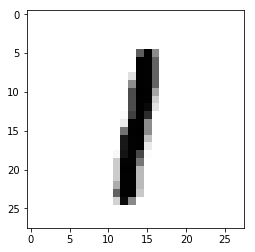

In [84]:
r = random.randint(0,mnist.test.num_examples-1)
print('Lbael:', sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print('Lbael:', sess.run(tf.argmax(hypothesis,1),feed_dict={X:mnist.test.images[r:r+1]}))
plt.imshow(
mnist.test.images[r:r+1].reshape(28,28),
    cmap='Greys',
    interpolation = 'nearest'
)

## 딥러닝으로 구현하기

In [87]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
print(mnist.train.images)

(55000, 784)
(55000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [88]:
x_train = mnist.train.images[:,:]
y_train = mnist.train.labels[:,:]

In [89]:
x_test = mnist.test.images[:,:]
y_test = mnist.test.labels[:,:]

In [93]:
X= tf.placeholder(tf.float32, shape=[None,28*28*1])
Y= tf.placeholder(tf.float32, shape=[None,10])


W1 = tf.Variable(tf.random_normal([28*28*1,28*28*1]))
B1 = tf.Variable(tf.random_normal([28*28*1]))
layer1 = tf.sigmoid(tf.matmul(X,W1)+B1)

W2 = tf.Variable(tf.random_normal([28*28*1,28*28*1]))
B2 = tf.Variable(tf.random_normal([28*28*1]))
layer2 = tf.sigmoid(tf.matmul(layer1,W2)+B2)

W3 = tf.Variable(tf.random_normal([28*28*1,10]))
B3 = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(layer2, W3)+B3
hypothesis = tf.nn.softmax(logits)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

###
prediction = tf.argmax(hypothesis,1)
correct_prediction = tf.equal(prediction, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
# sess = tf.Session()
# sess.run(tf.global_variables_initializer())
# for step in range(1000):
#     cost_v, _ = sess.run([cost, optimizer], feed_dict={X:x_train,Y:y_train})
#     if step %100 ==0 :
#         print('step', step, 'cost',cost_v)
# print(sess.run(accuracy, feed_dict={X:x_train,Y:y_train}))

In [94]:
training_epoch = 5
batch_size = 100
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epoch):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size) #550
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer],feed_dict={X:batch_xs,Y:batch_ys})
        avg_cost += c/total_batch
    print("Epoch :",epoch, 'Cost', avg_cost)

Epoch : 0 Cost 2.625688758709213
Epoch : 1 Cost 0.9919758350198925
Epoch : 2 Cost 0.6821994213624433


In [95]:
result = sess.run(accuracy, feed_dict={X:x_test, Y:y_test})
result

0.8676

In [ ]:
# 튜닝해보기
# sigmoid -> relu
# gradientdecent -> adamoptimizer

In [100]:
X= tf.placeholder(tf.float32, shape=[None,28*28*1])
Y= tf.placeholder(tf.float32, shape=[None,10])


W1 = tf.Variable(tf.random_normal([28*28*1,28*28*1]))
B1 = tf.Variable(tf.random_normal([28*28*1]))
layer1 = tf.nn.relu(tf.matmul(X,W1)+B1)

W2 = tf.Variable(tf.random_normal([28*28*1,28*28*1]))
B2 = tf.Variable(tf.random_normal([28*28*1]))
layer2 = tf.nn.relu(tf.matmul(layer1,W2)+B2)

W3 = tf.Variable(tf.random_normal([28*28*1,10]))
B3 = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(layer2, W3)+B3
hypothesis = tf.nn.softmax(logits)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

###
prediction = tf.argmax(hypothesis,1)
correct_prediction = tf.equal(prediction, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [101]:
training_epoch = 5
batch_size = 100
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epoch):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size) #550
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer],feed_dict={X:batch_xs,Y:batch_ys})
        avg_cost += c/total_batch
    print("Epoch :",epoch, 'Cost', avg_cost)

Epoch : 0 Cost 151.77945807511148
Epoch : 1 Cost 24.62350539332811
Epoch : 2 Cost 12.870315500952556
Epoch : 3 Cost 10.064707032248158
Epoch : 4 Cost 8.878893422100717


In [102]:
result = sess.run(accuracy, feed_dict={X:x_test, Y:y_test})
result

0.9655

Lbael: [4]
Lbael: [4]


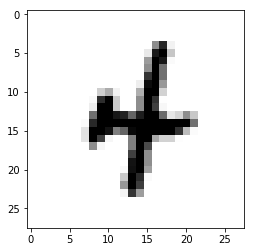

In [107]:
r = random.randint(0,mnist.test.num_examples-1)
print('Lbael:', sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print('Lbael:', sess.run(tf.argmax(hypothesis,1),feed_dict={X:mnist.test.images[r:r+1]}))
plt.imshow(
mnist.test.images[r:r+1].reshape(28,28),
    cmap='Greys',
    interpolation = 'nearest')